## Battle of Neighbourhoods - Final
This notebook consist of six parts.This notebook is continued version of "The Battle of Neighborhoods (Week 1)" 

1 Introduction/Business Problem \

   1.a Discussion of the business problem and the audience who would be interested in this project. \

2 Data Section\

   2.a What data is used?\
   2.b Importing Libraries\
   2.c Credentials and Core location\
   2.d Search for hotel & restaurant within 1 KM \
   2.e Location of Hotels\

3 Methodology Section\

   
   3.a How Far are hotels from the core location\
   3.b Explore for other venues around Dubai\
   3.c Extract Venues using Search Queries\
   3.d Location of all venues\
   3.e How far are venues from the core location?\
   3.g Venue Categories\
   3.h Rating of all Venues\
   3.i Number of Tips for all Venues\
   3.j Extracting Rated and Tips Venues\
   3.k Final list of Venues\
   3.l Clustering based on venues\
   3.m Center of all clusters & Midpoint of all venues\

4 Results Section\

   4.a My hotel location\
   4.b Top Rated Venues\
   4.c Spot my hotel against others\
   4.d Few more Stats\

5 Discussion Section
\
6 Conclusion Section\

1. Introduction/Business Problem \
Discussion of the business problem and the audience who would be interested in this project.
Something about the tourist place - Dubai,UAE

 Opening of Hotel/Restaurant Shop \
Coming down to business problem,I would like to open a hotel/restaurant near beach side.As it is a famous tourist spot,there is already lots of attention towards it.I know there will be many competitors in terms of hotel and restauramt.But keeping them in mind,i need to locate my hotel in place where more people are attracted and comfortable for a stay and a good meal.I want to bring foreign and local peoples attention towards my new hotel.I would like to flavour my retaurant recipe with Italian,American,typical south & north indian foods to grab their taste.

The challenge is to find a suitable location for opening a new hotel / restaurant attracted to all local and foreign people in the centre of all famous venues.

Expected / Interested Audience \
85% local and 15% foreign peoples visit kanyakumari once in a year.Some people stay for couple of days or more.Also they find some place for hangout or a good meal.Their main focus might be belonging to stay somewhere near to reach venues.Apart from these set of people,students and working professionals are common audience here.So we may need to fascinate them all.

2. Data section \
2.a What data is used? \
We will be completely working on Foursquare data to explore and try to locate our new hotel where more venues like church, temples, beach, museums, memorials that are present nearby.

How will we be solving using this data?

We will looking for midpoint area of venues to locate our new hotel.Before that our major focus will be on all venues present in and around the core place of kanyakumari.

Just a heads up on how many hotels are distributed now around kanyakumari.We will perform some EDA on hotels & restaurants present in the tourist spot.On furthur notebook we will use Foursquare data to determine other venues as well.

In [2]:
import pandas as pd
import numpy as np

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.distance import great_circle

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import json # library to handle JSON files

#import requests # library to handle requests
#from requests import get

#from bs4 import BeautifulSoup

#import re

#from time import sleep

# Matplotlib and associated plotting modules
#import matplotlib.cm as cm
#import matplotlib.colors as colors
#import matplotlib.pyplot as plt

import seaborn as sns

#import json # library to handle JSON files
#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
#from sklearn.cluster import KMeans

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                       

In [7]:
import json # library to handle JSON files

import requests # library to handle requests
from requests import get

from bs4 import BeautifulSoup

import re

from time import sleep
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#import k-means from clustering stage

from sklearn.cluster import KMeans # clustering algorithm


In [8]:
# Import libraries
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print("*********   Loaded library     ***********")

*********   Loaded library     ***********


In [9]:
CLIENT_ID = '2RRIH0BC5WFWWZBVFHXPSVDBBXQ4DUPPG2NH5KEC4F3DCMYA' # your Foursquare ID
CLIENT_SECRET = '0B05V0KYK04V0IU1CFLULTVPINOR1N2DAMLOFZWPOB0EJP3H' # your Foursquare Secret
VERSION = '20191028'
LIMIT = 150

address = "Dubai, United Arab Emirates"

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude =location.latitude   #8.079252 # location.latitude 
longitude =location.longitude #77.5499338 # location.longitude # 

Dub='Dubai location : {},{}'.format(latitude,longitude)
print(Dub)

Dubai location : 25.0750095,55.18876088183319


### 2.d Search for hotel & restaurant within 2 KM


In [108]:
#Quering for hotel & restaurant

search_query = 'hotel'
search_query_res = 'restaurant'

radius = 2000
url_hotel = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url_restaurant = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_res, radius, LIMIT)
#url

In [109]:
results_hotel = requests.get(url_hotel).json()
results_restaurant = requests.get(url_restaurant).json()
#results_hotel

### Send the GET Request of hotel & restaurants and examine the results¶


In [110]:

# assign relevant part of JSON to venues
venues_hotel = results_hotel['response']['venues']
venues_restaurant = results_restaurant['response']['venues']

# tranform venues into a dataframe and merging both data
dataframe_hotel = json_normalize(venues_hotel)
dataframe_restaurant = json_normalize(venues_restaurant)

dataframe = pd.concat([dataframe_hotel,dataframe_restaurant])

print("There are {} restaurants and hotels in Dubai".format(dataframe.shape[0]))

There are 37 restaurants and hotels in Dubai


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



### Define information of interest and filter dataframe

In [111]:

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

  
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

#dataframe_filtered
hotels_df=dataframe_filtered[['name','categories','distance','lat','lng','id']]
hotels_df.head()

,name,categories,distance,lat,lng,id
0,Hotel Grand Belle Vue,Hotel,2562,25.094812,55.175802,4e9245825c5ce36b18f3724a
1,Somewhere Hotel Tecom,Hotel,2772,25.096047,55.174039,579985b1498ef275bc6682b5
2,Time Crystal Hotel Apartments,Residential Building (Apartment / Condo),2309,25.092794,55.176963,51cea368498e45cf2b028cef
3,MiINC Hotel Apartments,College Library,2451,25.094028,55.176503,4bd8c52d2ecdce7206f1d0f2
4,Layia Oak Hotel & Suites,Hotel,2907,25.096887,55.173009,4bd846256a51ce726bbcde3f


In [112]:
hotels_df.shape

(37, 6)

In [113]:
hotels_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Dubai

# add a red circle marker to represent the core location of kanyakumari
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Dubai',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(hotels_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(hotels_df.lat, hotels_df.lng, hotels_df.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(hotels_map)

# display map
hotels_map


### 3.Methodology section
In this sections we will perform some data analysis and EDA to find insight from data.We will try to understand the current stats of all given data.Probably,clustering or centroid of all venues will help us to locate new hotel.

#### 3.a How Far are hotels from the core location¶


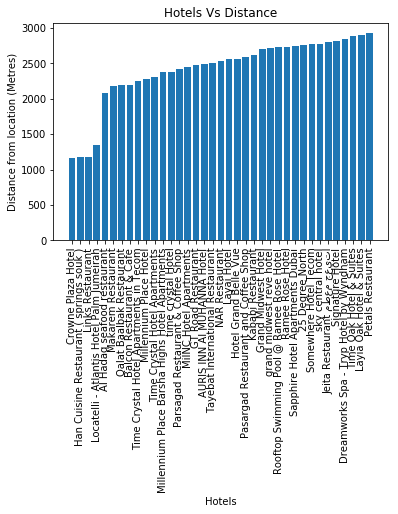

Average distance between hotels and core location is 2419 metres


In [114]:

distance_hotel_df=hotels_df[['name','categories','distance','lat','lng']].sort_values('distance')

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(distance_hotel_df.name))
    plt.bar(distance_hotel_df.name, distance_hotel_df.distance)
    plt.xlabel('Hotels')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_hotel_df.name,rotation=90)
    plt.title('Hotels Vs Distance')
    plt.show()
plot_bar_x()

print("Average distance between hotels and core location is {} metres".format(int(sum(hotels_df['distance'])/hotels_df.shape[0])))

### 3.c Explore for other venues around Dubai
A tourist person always wants to visit nearby iconic places.So he wants to reside somewhere nearby to all major venues.We will be exploring more venues around the core location.We will be digging more on main areas or place around 2 km.

In [115]:
radius=2000
url_venues = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
#url_venues

In [116]:

import requests

results_venues = requests.get(url_venues).json()
'There are {} venues around Dubai.'.format(len(results_venues['response']['groups'][0]['items']))

'There are 17 venues around Dubai.'

In [117]:
items_venues = results_venues['response']['groups'][0]['items']
#items_venues[0]

In [118]:
dataframe_venues = json_normalize(items_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe_venues.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered_venues = dataframe_venues.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered_venues['venue.categories'] = dataframe_filtered_venues.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered_venues.columns = [col.split('.')[-1] for col in dataframe_filtered_venues.columns]

dataframe_filtered_venues.name

0          The Springs Souk (سوق الينابيع)
1                                Xenia DXB
2                         Carrefour Market
3                        Le Pain Quotidien
4                                Starbucks
5                               Choithrams
6                    Jebel Ali Race Course
7                           Caribou Coffee
8                          The Town Centre
9                          The Coffee Club
10    McDonald's (ماكدونالدز) (ماكدونالدز)
11                               Springs 6
12         Carluccio's - The Springs Souks
13               Russo’s New York Pizzeria
14                   Charlie's Grilled Sub
15                     Club Emirates Hills
16                        Bakemart Gourmet
Name: name, dtype: object


### 3.d Extract Venues using Search Queries
When I searched in google map,I could see there were some venues missing.Temples,Church,Parks and Museums are also more recognized by visitors and local audience.So lets bring their data inside.I am not sure why Foursquare hasnt captured it while trying venue query.

Below is the function to extract many queries at a time by passing them in a single list

In [119]:
# search query function
search_query_list = ['temple','church','park','museum'] 
radius =2000
temp_df=[]
search_df=[]

def search_query_fn():   
    #Loop to run through urls and from json to pandas
    for i in range(len(search_query_list)):
        url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_list[i], radius, LIMIT)
        
        results=requests.get(url).json()
        venues = results['response']['venues']
        
        #Normalize from json
        dataframe = json_normalize(venues)
        
        #Removing unwanted column headers
        dataframe.columns = [col.split('.')[-1] for col in dataframe.columns]
        temp_df.append(dataframe)
    
    #Loop to append dataframes to single dataframe
    for j in range(len(search_query_list)):
        data=temp_df[j]
        search_df.append(data)

# Function to run loop over queries
search_query_fn()

search_df = pd.concat(search_df,sort=True)
search_df['categories'] = search_df.apply(get_category_type, axis=1)
search_df = pd.DataFrame(search_df[['name','categories','distance','lat','lng','id']])
search_df

,name,categories,distance,lat,lng,id
0,Christ Church Jebal Ali,Church,1175,25.064539,55.187243,5077e6f7e4b05b62b22596e6
1,Gateway Church Dubai,Church,2733,25.097726,55.178465,4be3bdd621d5a593d6f31911
0,JVC Community Park 18/4,Park,2578,25.053709,55.198815,5e40671ba4fd7e0008fff048
1,Jumeirah Village Triangle Park,Park,2289,25.055689,55.196550,5548e5ff498eac5b1777f5ce
2,Springs Dog Park,Dog Run,1714,25.059635,55.189716,5c73e7bf41868600393bf358
3,JVC Park 1/15,Park,2472,25.057304,55.203563,572afc7a498e61ac539796de
4,Iris Park Town House No. 4,Residential Building (Apartment / Condo),1998,25.060022,55.199667,50cd61c6498ee21ad6ef0fa8
5,Mulberry Park Villa 15,Professional & Other Places,2002,25.059758,55.199292,4e177d6c2271b0e971f2e266
6,Basketball court district 7 Park A,Basketball Court,2423,25.056504,55.201425,5716576ecd1037bdb9452edf
7,nuran park,Park,2424,25.093491,55.176028,4b94f93ef964a520f38934e3


In [120]:
# Data extracted from foursquare venues
four_sq_venue=pd.DataFrame(dataframe_filtered_venues[['name','categories','distance','lat','lng','id']])

# Data extracted from search queries
new_venues=pd.DataFrame(search_df)

# Concatenate both dataframe
df_venue=pd.concat([four_sq_venue, new_venues],sort=True)

In [121]:
to_drop = ['Hotel', 'Restautant','hotel','Resort']
df_venues = df_venue[~df_venue['name'].str.contains('|'.join(to_drop))].reset_index()
print("There are {} venues in Dubai".format(df_venues.shape[0]))
df_venues[['name','distance','id']]

There are 34 venues in Dubai


,name,distance,id
0,The Springs Souk (سوق الينابيع),1170,5b06b3346bd36b00396880d2
1,Xenia DXB,998,5c16367f46e1b6002c337a97
2,Carrefour Market,1179,5b0d5952b77c77002c104f16
3,Le Pain Quotidien,1046,5b2cd85781a0ea002ca22fe0
4,Starbucks,1023,5b533f571fa763002c71b18d
5,Choithrams,1984,56c9b1ffcd10931e4c94b632
6,Jebel Ali Race Course,1123,4b62c135f964a5205f512ae3
7,Caribou Coffee,1081,5b1b6ae72aff310039101d23
8,The Town Centre,1016,4d20b8fe756e8cfa53e66e54
9,The Coffee Club,1054,5b364ab666f3cd003908cb27


In [122]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Kanyakumari
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Dubai',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(df_venues.lat, df_venues.lng, df_venues.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        #popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### 3.f How far are venues from the core location?¶


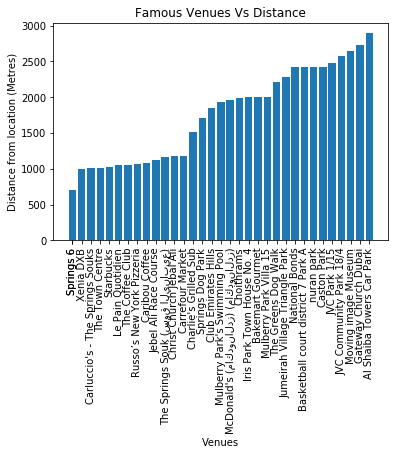

In [123]:
distance_venues_df=df_venues.sort_values('distance')

def plot_bar_venue():
    # this is for plotting purpose
    index = np.arange(len(distance_venues_df.name))
    plt.bar(distance_venues_df.name, distance_venues_df.distance)
    plt.xlabel('Venues')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_venues_df.name,rotation=90)
    plt.title('Famous Venues Vs Distance')
    plt.show()
plot_bar_venue()

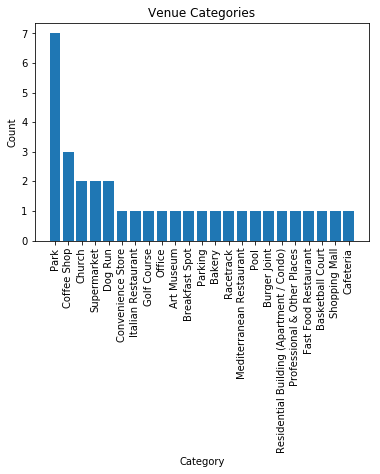

In [124]:
freq_venue=df_venues['categories'].value_counts()
freq_venue=pd.DataFrame(freq_venue).reset_index()
freq_venue.columns=['Category','Count']
freq_venue

def plot_bar_categ():
    # this is for plotting purpose
    index = np.arange(len(freq_venue.Category))
    plt.bar(freq_venue.Category, freq_venue.Count)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(freq_venue.Category,rotation=90)
    plt.title('Venue Categories')
    plt.show()
plot_bar_categ()

In [125]:
#Rating of venues
rating_df=[]

for k in range(df_venues.shape[0]):
    venue_id=df_venues.id[k]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    #print(result)
    try:
        #print(df_venues.name[k],result['response']['venue']['rating'])
        rating=result['response']['venue']['rating']
        rating_df.append(rating)
        
    except:
        #print(df_venues.name[k],'This venue has not been rated yet.')
        rating='No Rating Yet'
        rating_df.append(rating)

In [126]:

rate_dict = {'Venue': df_venues.name, 'Rating': rating_df,'distance':df_venues.distance}
rate_df=pd.DataFrame(rate_dict)
rate_df

,Venue,Rating,distance
0,The Springs Souk (سوق الينابيع),No Rating Yet,1170
1,Xenia DXB,No Rating Yet,998
2,Carrefour Market,No Rating Yet,1179
3,Le Pain Quotidien,No Rating Yet,1046
4,Starbucks,No Rating Yet,1023
5,Choithrams,No Rating Yet,1984
6,Jebel Ali Race Course,No Rating Yet,1123
7,Caribou Coffee,No Rating Yet,1081
8,The Town Centre,No Rating Yet,1016
9,The Coffee Club,No Rating Yet,1054


In [127]:
tips_df=[]

for k in range(df_venues.shape[0]):
    venue_id=df_venues.id[k]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    
    #print(result['response']['venue']['tips']['count'],result['response']['venue'])
    tips=result['response']
    tips_df.append(tips)

In [128]:

tips_dict = {'Venue': df_venues.name, 'Tips': tips_df,'distance':df_venues.distance}
tips=pd.DataFrame(tips_dict)
#tips=tips.sort_values('Tips',ascending = False)
tips

,Venue,Tips,distance
0,The Springs Souk (سوق الينابيع),{},1170
1,Xenia DXB,{},998
2,Carrefour Market,{},1179
3,Le Pain Quotidien,{},1046
4,Starbucks,{},1023
5,Choithrams,{},1984
6,Jebel Ali Race Course,{},1123
7,Caribou Coffee,{},1081
8,The Town Centre,{},1016
9,The Coffee Club,{},1054


In [64]:

# Add Tips column to Rating Dataframe
rate_df['Tips']=tips['Tips']

#Lets take values of only rated venues
only_rated_tips = rate_df[(rate_df['Rating']!='No Rating Yet') | (rate_df['Tips']!=0)]

only_rated_tips.reset_index(inplace = True,drop = True) 
only_rated_tips

,Venue,Rating,distance,Tips
0,The Springs Souk (سوق الينابيع),No Rating Yet,1170,{}
1,Xenia DXB,No Rating Yet,998,{}
2,Carrefour Market,No Rating Yet,1179,{}
3,Le Pain Quotidien,No Rating Yet,1046,{}
4,Starbucks,No Rating Yet,1023,{}
5,Choithrams,No Rating Yet,1984,{}
6,Jebel Ali Race Course,No Rating Yet,1123,{}
7,Caribou Coffee,No Rating Yet,1081,{}
8,The Town Centre,No Rating Yet,1016,{}
9,The Coffee Club,No Rating Yet,1054,{}


In [129]:
rated_list=[]
for i in range(len(only_rated_tips)):
    rated_tip_temp=only_rated_tips['Venue'][i]
    rated_list.append(rated_tip_temp)

#Masking all values present in list
mask = df_venues['name'].isin(rated_list)

final_venues = df_venues[mask]
#final_venues['location']=final_venues['lat'].astype(str).str.cat(final_venues['lng'].astype(str), sep=' - ')
final_venues.reset_index(inplace = True,drop = True) 

final_venues

,index,categories,distance,id,lat,lng,name
0,0,Shopping Mall,1170,5b06b3346bd36b00396880d2,25.065235,55.193044,The Springs Souk (سوق الينابيع)
1,1,Mediterranean Restaurant,998,5c16367f46e1b6002c337a97,25.066483,55.191847,Xenia DXB
2,2,Supermarket,1179,5b0d5952b77c77002c104f16,25.065172,55.193104,Carrefour Market
3,3,Breakfast Spot,1046,5b2cd85781a0ea002ca22fe0,25.066097,55.192052,Le Pain Quotidien
4,4,Coffee Shop,1023,5b533f571fa763002c71b18d,25.066278,55.191954,Starbucks
5,5,Supermarket,1984,56c9b1ffcd10931e4c94b632,25.069045,55.207307,Choithrams
6,6,Racetrack,1123,4b62c135f964a5205f512ae3,25.084978,55.187022,Jebel Ali Race Course
7,7,Coffee Shop,1081,5b1b6ae72aff310039101d23,25.065833,55.192289,Caribou Coffee
8,8,Convenience Store,1016,4d20b8fe756e8cfa53e66e54,25.066375,55.192035,The Town Centre
9,9,Coffee Shop,1054,5b364ab666f3cd003908cb27,25.066055,55.192165,The Coffee Club


In [69]:
# one hot encoding
neighbor_onehot = pd.get_dummies(final_venues[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neighbor_onehot['name'] = final_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [neighbor_onehot.columns[-1]] + list(neighbor_onehot.columns[:-1])
neighbor_onehot = neighbor_onehot[fixed_columns]

neighbor_onehot.head()

,name,Art Museum,Bakery,Basketball Court,Breakfast Spot,Burger Joint,Cafeteria,Church,Coffee Shop,Convenience Store,Dog Run,Fast Food Restaurant,Golf Course,Italian Restaurant,Mediterranean Restaurant,Office,Park,Parking,Pool,Professional & Other Places,Racetrack,Residential Building (Apartment / Condo),Shopping Mall,Supermarket
0,The Springs Souk (سوق الينابيع),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Xenia DXB,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Carrefour Market,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Le Pain Quotidien,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Starbucks,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
neighbor_onehot.shape
neighbor_grouped = neighbor_onehot.groupby('name').mean().reset_index()

In [71]:
# Top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['name'] = neighbor_grouped['name']

In [72]:
# Clustering

# set number of clusters
kclusters = 3

neighbor_grouped_clustering = neighbor_grouped.drop('name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighbor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Clustersss', kmeans.labels_)

neighbor_merged = final_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
neighbor_merged = neighbor_merged.join(neighborhoods_venues_sorted.set_index('name'), on='name')

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [73]:
fin=neighbor_merged.groupby(['Clustersss']).mean()

lati=sum(fin.lat)/len(fin.lat)
longi=sum(fin.lng)/len(fin.lng)

#Taking midpoint of top ten closest hotel
venues_lan=sum(final_venues.lat)/len(final_venues.lat)
venues_lng=sum(final_venues.lng)/len(final_venues.lng)

final_latitude=(lati+venues_lan)/2
final_longitude=(longi+venues_lng)/2

print("Final location (Green Dot in our below given map) of our brand new hotel:{},{}".format(final_latitude,final_longitude))

Final location (Green Dot in our below given map) of our brand new hotel:25.071412084052277,55.19032813479931


4. Results section
4.a My hotel location
Final location is pointed at 25.071412084052277,55.19032813479931

This location is at Emirates Hills.

Located at exact junction of two cross roads which can give more attention to people who passby.

4.b Top Rated Venues
The Springs Souk (سوق الينابيع)	
Xenia DXB	
Carrefour Market	
Le Pain Quotidien	
Starbucks	
Choithrams	


### 5. Discussion section
From above reports,we could get an idea why the predicted one is pointed/clustered on the given spot.First most thing could be the center of attraction for the place.

KMeans have figured out the most common place for all the venues.This output was very adjacent to the core location.This proves the accurate spotting of our predicted algorithm.

Despite of the findings,there were some lack in data.Tips and ratings were missing for most of the venues.Also when I compared foursquare data with google map ,i could see there were many hotels and venues found missing in foursquare.


### 6. Conclusion section
As a business person,one would be able to set up a hotel/restaurant on given spot.This will bring revenue automatically as we have located in very near to core one.We proved this with Kmeans.

Future Expectation:

As mentioned earlier,most of data needs to be extracted from googlemaps.Even though we got somewhat accurate prediction.To be very confident on concluding our output,we may need more data to analyse.

Research based on hotel reviews and restaurant menus could be used for future purpose.